<a href="https://colab.research.google.com/github/Xxzero3211/Delete/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/Xxzero3211/Delete/main/titanic.csv')

In [43]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [44]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [45]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [46]:
imputer_mean = SimpleImputer(strategy='mean')

In [47]:
df['Age'] = imputer_mean.fit_transform(df[['Age']])

In [48]:
imputer_mode = SimpleImputer(strategy='most_frequent')

In [49]:
X = df[['Age']]

In [50]:
y = df['Fare']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [63]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


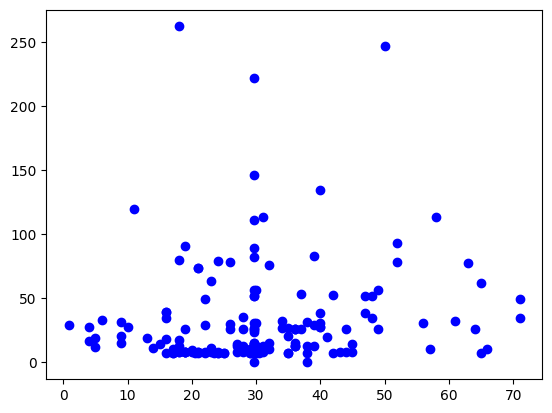

In [55]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')

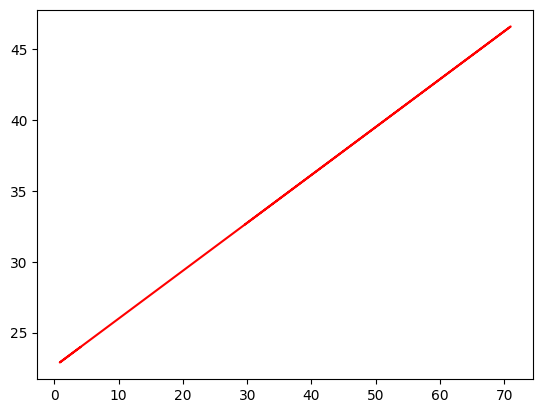

In [56]:
plt.plot(X_test, y_pred, color='red', label='Regression line')

Text(0.5, 0, 'Age')

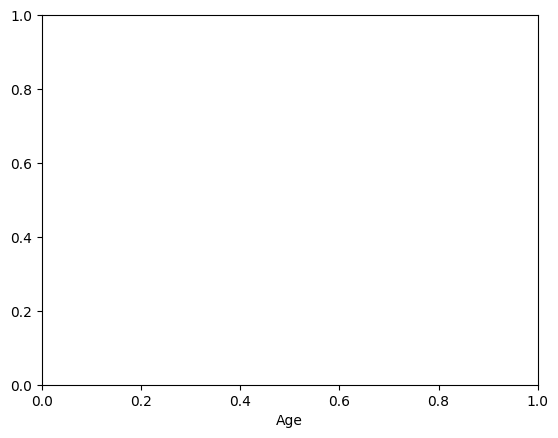

In [57]:
plt.xlabel('Age')

Text(0, 0.5, 'Fare')

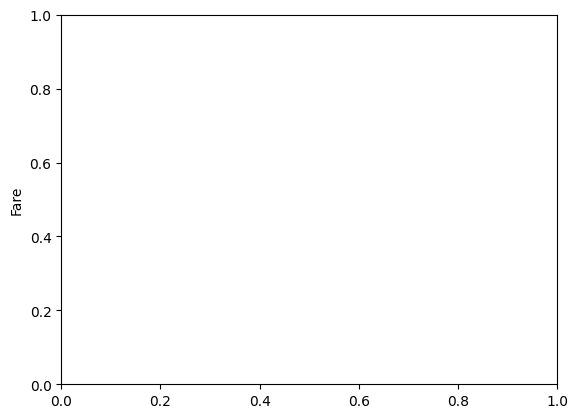

In [58]:
plt.ylabel('Fare')

Text(0.5, 1.0, 'Linear Regression: Age vs Fare')

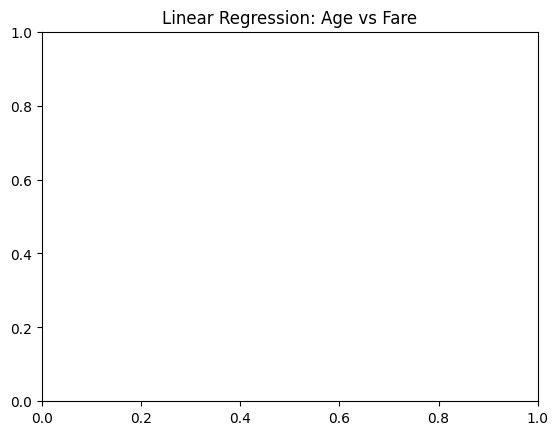

In [59]:
plt.title('Linear Regression: Age vs Fare')

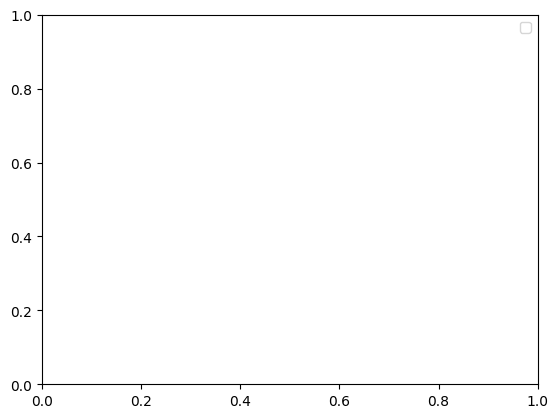

In [60]:
plt.legend()

In [61]:
plt.show()